In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Read the data
df = pd.read_csv('Height_Weight.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# binarize the label
df['weight_cat'] = df['Weight'].apply(lambda x : 1 if x>103 else 0)
df.head()

,Gender,Height,Weight,weight_cat
0,Male,73.847017,241.893563,1
1,Male,68.781904,162.310473,1
2,Male,74.110105,212.740856,1
3,Male,71.730978,220.042470,1
4,Male,69.881796,206.349801,1


In [5]:
train, test = train_test_split(df, test_size=0.3, random_state=11)
train = train.sort_values('Height')
test = test.sort_values('Height')

# predictors
xtrain = train['Height'].to_frame()
xtest  = test['Height'].to_frame()

# output or label
ytrain = train['weight_cat']
ytest  = test['weight_cat']

In [6]:
ytrain.shape

(7000,)

In [7]:
# building logistic regression model
log_regression = LogisticRegression()

In [8]:
# fit the model to the training data
log_regression.fit(xtrain,ytrain)

LogisticRegression()

In [9]:
# making predictions on test data
# log_regression.predict_proba(xtest) gives two probability values corresponding to each label for each row
# we are selecting probabilities for label 1 which indicates a high weight category in our specific example
y_pred_proba = log_regression.predict_proba(xtest)[::,1]

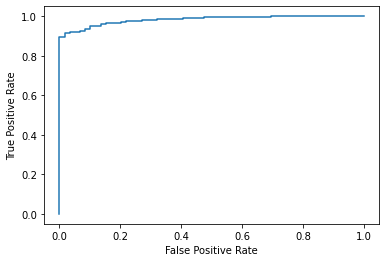

In [10]:
#create ROC curve
fpr, tpr, thresholds = roc_curve(ytest,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
print (len(thresholds))
print (len(ytest))
print (len(y_pred_proba))

70
3000
3000


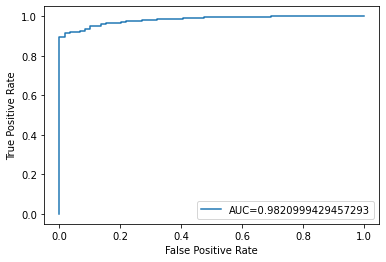

In [12]:
# area under the curve
auc = roc_auc_score(ytest, y_pred_proba)

# create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()